e:\Programs\Anaconda\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4300 - loss: 80.4596 - val_accuracy: 0.7913 - val_loss: 50.1903
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7990 - loss: 43.5365 - val_accuracy: 0.8077 - val_loss: 27.6100
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8163 - loss: 24.0783 - val_accuracy: 0.8149 - val_loss: 15.6267
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8143 - loss: 13.7532 - val_accuracy: 0.8149 - val_loss: 9.2523
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8130 - loss: 8.2578 - val_accuracy: 0.8073 - val_loss: 5.8572
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8099 - loss: 5.3276 - val_accuracy: 0.8017 - val_loss: 4.0469
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8042 - loss: 3.7657 - val_accuracy: 0.7944 - val_loss: 3.0807
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7972 - loss: 2.9284 - v

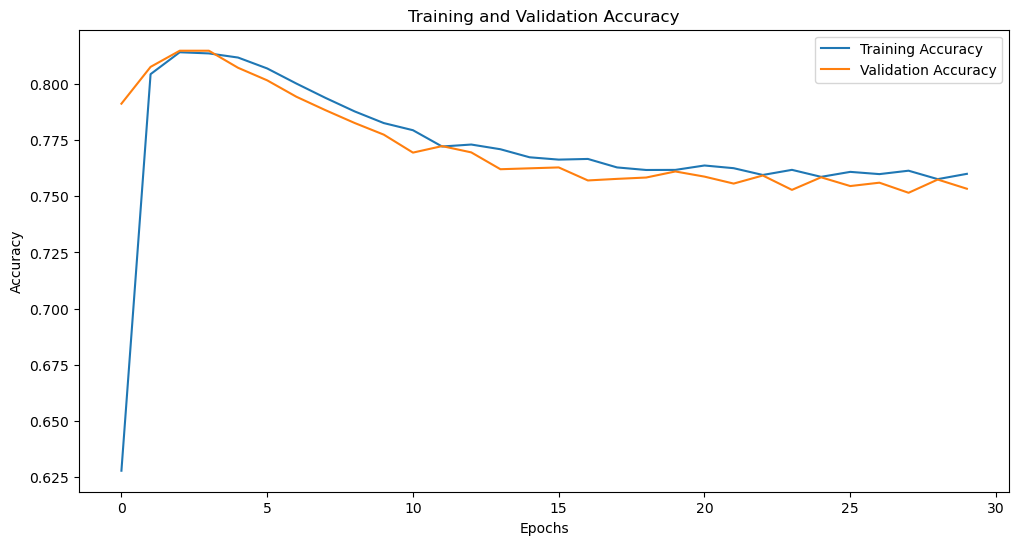

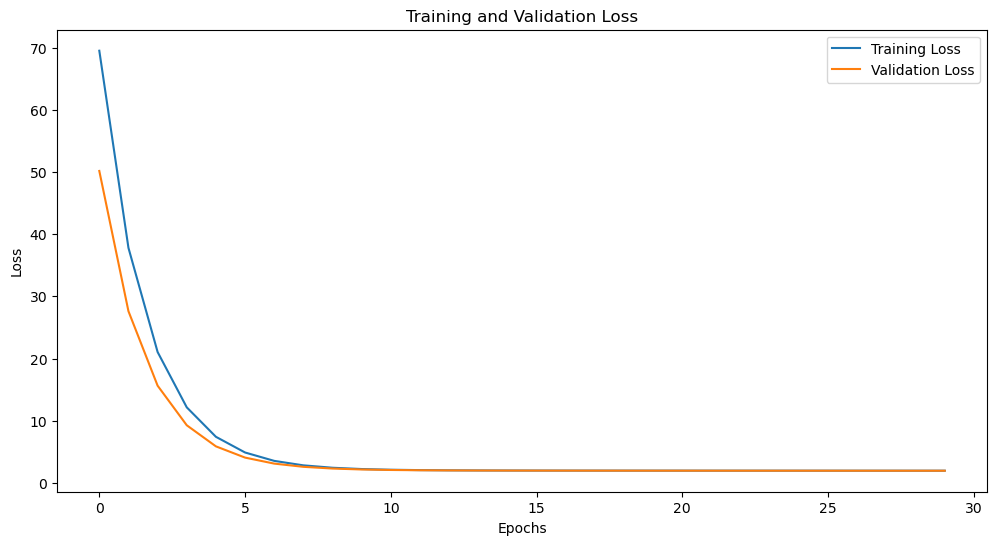

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# 1. Tải dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. Chuẩn hóa dữ liệu và chuyển đổi nhãn thành dạng one-hot
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Chia tập validation từ tập training
np.random.seed(0)
train_indices = np.random.choice(X_train.shape[0], 50000, replace=False)
valid_indices = [i for i in range(X_train.shape[0]) if i not in train_indices]
X_valid, y_valid = X_train[valid_indices], y_train[valid_indices]
X_train, y_train = X_train[train_indices], y_train[train_indices]

# 4. Xây dựng mô hình Sequential
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Chuyển ảnh 28x28 thành vector 784 phần tử
    Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),  # Lớp ẩn
    Dense(10, activation='softmax')  # Lớp đầu ra với 10 lớp
])

# 5. Compile mô hình
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.008),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Huấn luyện mô hình
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(X_valid, y_valid))

# 7. Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# 8. Trực quan hóa trọng số của lớp ẩn đầu tiên
weights_layer_1, _ = model.layers[1].get_weights()

plt.figure(figsize=(18, 18))
indices = np.random.choice(weights_layer_1.shape[1], 225)  # Chọn 225 trọng số ngẫu nhiên
for i, idx in enumerate(indices):
    plt.subplot(15, 15, i + 1)
    plt.imshow(weights_layer_1[:, idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle("Visualization of Weights in the Hidden Layer")
plt.show()

# 9. Vẽ biểu đồ Accuracy và Loss trong quá trình huấn luyện
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
